In [32]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load and preprocess images

In [33]:
fldr = 'UTKFace'
flies = os.listdir(fldr)

ages = []
genders = []
images = []

for fle in flies:
    age = int(fle.split('_')[0])
    gender = int(fle.split('_')[1])
    total = fldr + '/' + fle
    image = cv2.imread(total)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48, 48))
    images.append(image)
    ages.append(age)
    genders.append(gender)

images_f = np.array(images) / 255.0
ages_f = np.array(ages)
genders_f = np.array(genders)

# Split the dataset into training and testing

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(images_f, np.array([genders_f, ages_f]).T, test_size=0.25)

# Split labels into gender and age for training
Y_train_2 = [Y_train[:, 0], Y_train[:, 1]]
Y_test_2 = [Y_test[:, 0], Y_test[:, 1]]


# Define Model & Print Model Summary

In [35]:
def create_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x1 = Dense(64, activation='relu')(x)
    x2 = Dense(64, activation='relu')(x)
    x1 = Dropout(0.5)(x1)
    x2 = Dropout(0.5)(x2)
    gender_output = Dense(1, activation='sigmoid', name='gender_out')(x1)
    age_output = Dense(1, activation='relu', name='age_out')(x2)

    model = Model(inputs, [gender_output, age_output])
    model.compile(optimizer='adam', loss=['binary_crossentropy', 'mae'], metrics=['accuracy', 'mae'])
    return model

# Create and Print Summary Model

In [36]:
model = create_model((48, 48, 3))
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 48, 48,    │        896 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 24, 24,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 24, 24,    │     18,496 │ max_pooling2d_9[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 12, 12,    │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 12, 12,    │     73,856 │ max_pooling2d_10… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 6, 6, 128) │          0 │ conv2d_11[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 4608)      │          0 │ max_pooling2d_11… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │    294,976 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │    294,976 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 64)        │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_out (Dense)  │ (None, 1)         │         65 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_out (Dense)     │ (None, 1)         │         65 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 683,330 (2.61 MB)

 Trainable params: 683,330 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [37]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('roller_coaster_model.keras', monitor='val_loss', save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True)
callbacks = [checkpoint, early_stop]

history = model.fit(X_train, Y_train_2, validation_data=(X_test, Y_test_2), batch_size=64, epochs=100, callbacks=callbacks)


Epoch 1/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 37s 119ms/step - age_out_mae: 18.5469 - gender_out_accuracy: 0.5178 - loss: 19.2456 - val_age_out_mae: 15.8569 - val_gender_out_accuracy: 0.6513 - val_loss: 16.5138
Epoch 2/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - age_out_mae: 14.9323 - gender_out_accuracy: 0.5837 - loss: 15.5924 - val_age_out_mae: 11.1237 - val_gender_out_accuracy: 0.7753 - val_loss: 11.6781
Epoch 3/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 32s 115ms/step - age_out_mae: 12.1497 - gender_out_accuracy: 0.6292 - loss: 12.7337 - val_age_out_mae: 9.7024 - val_gender_out_accuracy: 0.8080 - val_loss: 10.1441
Epoch 4/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 37s 134ms/step - age_out_mae: 10.9642 - gender_out_accuracy: 0.6330 - loss: 11.5226 - val_age_out_mae: 9.0031 - val_gender_out_accuracy: 0.8210 - val_loss: 9.4501
Epoch 5/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 33s 120ms/step - age_out_mae: 10.5121 - gender_out_accuracy: 0.6541 - loss: 11.0503 - val_age_out_mae: 8.5708 - val_gender_out_accuracy: 0

# Evaluate the model


In [38]:
model.evaluate(X_test, Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - age_out_mae: 6.7726 - gender_out_accuracy: 0.8789 - loss: 7.0596


[7.037454605102539, 6.7517781257629395, 0.8795343637466431]

# Save Model

In [39]:
model.save('final_roller_coaster_model.keras')

# Make Predictions

In [40]:
y_pred = model.predict(X_test)
y_pred_gender = (y_pred[0] > 0.5).astype(int).flatten()
y_true_gender = Y_test_2[0].astype(int).flatten()

186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


# Classification Report

In [41]:
report = classification_report(y_true_gender, y_pred_gender, target_names=['Male', 'Female'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

        Male       0.85      0.93      0.89      3069
      Female       0.92      0.82      0.87      2858

    accuracy                           0.88      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



# Confusion Matrix

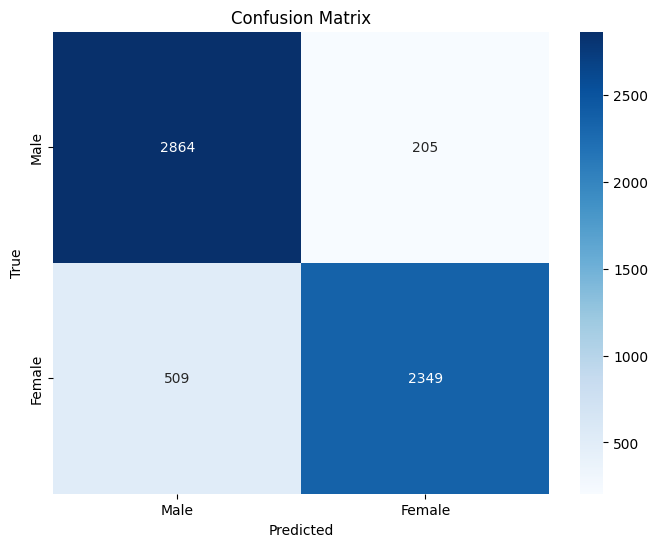

In [42]:
cm = confusion_matrix(y_true_gender, y_pred_gender)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()